In [ ]:
import matplotlib.pyplot as plt
plt.style.use('default')
import numpy as np
import re
import nltk

In [ ]:
from nltk.tag import DefaultTagger 
default_tagger = DefaultTagger('PU')
frase = "uma frase qualquer".split()
default_tagger.tag(frase)

In [ ]:
# Carregar o corpus e pré-processar
s = open('./datasets/macmorpho-train.txt', 'r', encoding='utf-8').read()
s = re.split(r'\.+_PU', s)
s = [s0.strip() for s0 in s]
s = [re.split('\s+', s0) for s0 in s]
s = [ [ tuple(re.split('_', w0)) for w0 in p] for p in s]
s = [ [ w for w in p if len(w)==2 ] for p in s ] 
s = [ [ (w[0].lower(), w[1]) for w in p] for p in s ]
s = [p for p in s if len(p)>5]      
# s[frase][palavra] = (palavra, tipo)
print(s[0:2])

In [ ]:
# Carregar o corpus de teste
# Carregar o corpus e pré-processar
s_ = open('./datasets/macmorpho-test.txt', 'r', encoding='utf-8').read()
s_ = re.split(r'\.+_PU', s_)
s_ = [s0.strip() for s0 in s_]
s_ = [re.split('\s+', s0) for s0 in s_]
s_ = [ [ tuple(re.split('_', w0)) for w0 in p] for p in s_]
#s = [ [ t for t in p if t[0] in vocab.keys() ] for p in s ]
s_ = [ [ w for w in p if len(w)==2 ] for p in s_ ] 
s_ = [ [ (w[0].lower(), w[1]) for w in p] for p in s_ ]
s_ = [p for p in s_ if len(p)>5]
# s[frase][palavra] = (palavra, tipo)

In [ ]:
default_tagger.evaluate(s_)

In [ ]:
from nltk.tag import UnigramTagger
unigram_tagger = UnigramTagger(s, backoff=default_tagger)
unigram_tagger.evaluate(s_)

In [ ]:
unigram_tagger.tag("Segurando a vela a viúva vela seu finado esposo".split())

In [ ]:
from nltk.tag import AffixTagger 
affix_tagger = AffixTagger(s, affix_length=-3, min_stem_length=2)
affix_tagger.evaluate(s_)

In [ ]:
from nltk.tag import BigramTagger
tagger = BigramTagger(s)
tagger.evaluate(s_)

In [ ]:
#frase = "São Paulo é uma cidade grande"
frase = "As pessoas são tão loucas"
print(tagger.tag(frase.lower().split()))


In [ ]:
from nltk.tag import NgramTagger
ngram_tagger = NgramTagger(1, s)
ngram_tagger.evaluate(s_)


In [ ]:
taggers = []
taggers.append(DefaultTagger('N'))

for n in range(3):
    taggers.append(NgramTagger(n+1, s, backoff=taggers[n]))


In [ ]:
acc = []
for t in taggers:
    acc.append(t.evaluate(s_))
print(acc)

In [ ]:
plt.figure()
plt.plot(np.arange(len(acc)), acc)
plt.show()

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
pos_tag("this is my testing sentence".split())

In [ ]:
def lexical_density(sentence):
    tagr = taggers[-1]
    tags = tagr.tag(sentence.split())
    count = 0
    hit = 0
    print(tags)
    for i in tags:
        if i[1] == "N" or i[1] == "V" or i[1] == "NPROP" or i[1] == "VAUX":
            hit += 1
        count += 1 
    return hit/count
sentence = "O grande assunto da semana em Nova York é o filme do Batman já que nele o ator principal come caçarola"
print(lexical_density(sentence))
print(lexical_density("Hércules derrotou brilhantemente o terrível Leão de Neméia"))
print(lexical_density("Comecei a cozinhar pra valer mesmo em 2011, ano que casei. Porém um pouco antes, quando ainda estava procurando apartamento, já sabia que queria uma cozinha tipo americana, afinal, cozinhar e conversar ao mesmo tempo era essencial"))

In [25]:

import pandas as pd
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
plt.style.use('default')
import numpy as np
import unidecode
import urllib
import string

stopwords_list = urllib.request.urlopen("https://gist.githubusercontent.com/rg089/35e00abf8941d72d419224cfd5b5925d/raw/12d899b70156fd0041fa9778d657330b024b959c/stopwords.txt").read().decode()
stopwords_en = set(stopwords_list.split())
stopwords_en.remove("not")

df = pd.read_csv('./datasets/IMDB Dataset.csv')

In [ ]:
reviews_v

/home/user/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['articl', 'mon'] not in stop_words.
  warnings.warn(


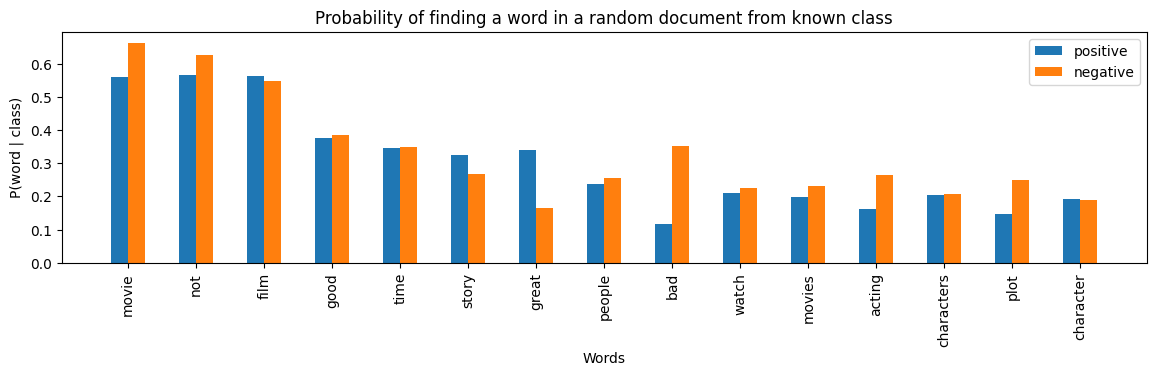

In [28]:

# Passo 1: executar vectorizer ao longo de toda a coleção
reviews = [s for s in df['review']]
vectorizer = CountVectorizer(binary=True, stop_words=stopwords_en)
x = vectorizer.fit_transform(reviews)
x_ = np.mean(x, axis=0)

# Passo 2: escolher somente elementos correspondentes a cada categoria
filtro_pos = df['sentiment']=='positive'
x_pos = x[filtro_pos,:] # Escolho linhas com sentimento positivo
x_pos_ = np.mean(x_pos, axis=0)
filtro_neg = df['sentiment']=='negative'
x_neg = x[filtro_neg,:] # Escolho linhas com sentimento negativo
x_neg_ = np.mean(x_neg, axis=0)

# Passo 3: ordenar palavras de acordo com a soma geral. Vou incluir tambem a contagem nos grupos positivo e negativo!
tuplas = [ (\
            x_[0,vectorizer.vocabulary_[i]],\
            i,\
            x_pos_[0, vectorizer.vocabulary_[i]],\
            x_neg_[0, vectorizer.vocabulary_[i]]\
            ) for i in vectorizer.vocabulary_.keys() ]
tuplas_ordenadas = sorted(tuplas, reverse=True)
palavras = [ t[1] for t in tuplas_ordenadas ]
contagens_pos = [ t[2] for t in tuplas_ordenadas ]
contagens_neg = [ t[3] for t in tuplas_ordenadas ]

eixo_x = np.arange(len(palavras))
n_palavras = 15

plt.figure(figsize=(14,3))
plt.bar(eixo_x[0:n_palavras]-0.125, contagens_pos[0:n_palavras], width=0.25, label='positive')
plt.bar(eixo_x[0:n_palavras]+0.125, contagens_neg[0:n_palavras],  width=0.25, label='negative')
plt.legend()
plt.xticks(eixo_x[0:n_palavras], palavras[0:n_palavras], rotation=90)
plt.ylabel('P(word | class)')
plt.xlabel('Words')
plt.title('Probability of finding a word in a random document from known class')
plt.show()
